<a href="https://colab.research.google.com/github/agusz96/TP-Final-DataVis/blob/main/TP_Final_Data_Vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico Final Visualización de Datos

Fecha: 19/12/2024

Pablo Alberto Rozenblat y Agustín Ezequiel Zappino

Grupo B


## Introducción

Elegimos trabajar con un conjunto de datos de establecimientos listados en Airbnb dentro de la ciudad de Milán,  proporcionado por https://insideairbnb.com/.

In [ ]:
library(IRdisplay)
gt_url <- "https://prozenblat14.github.io/ds.02/TPS/TPF/MapaMilan.html"
iframe <- sprintf('<iframe src="%s" width="800" height="600px" frameborder="0"></iframe>', gt_url)
display_html(iframe)

## Descripción del conjunto de datos

In [ ]:
milan <- read.csv("https://data.insideairbnb.com/italy/lombardy/milan/2024-09-17/visualisations/listings.csv")
dim(milan)

[1] 23705    18

Los datos están actualizados al 17 de septiembre de 2024 y la base cuenta con 23705 registros y 18 variables:
*   **id**: Identificador único del Establecimiento.
*   **name**: Nombre del Establecimiento.
*   **host_id y host_name**: Identificación y nombre del anfitrión.
*   **neighbourhood_group y neighbourhood**: Barrio donde se encuentra el establecimiento.
*   **latitude y longitude**: Ubicación geográfica del Establecimiento.
*   **room_type**: Tipo de habitación ofrecida.
*   **price**: Precio por noche.
*   **minimum_nights**: Número mínimo de noches para reservar.
*   **number_of_reviews**: Total de reseñas recibidas.
*   **last_review**: Fecha de la última reseña.
*   **reviews_per_month**: Promedio de reseñas por mes.
*   **calculated_host_listings_count**: Cantidad de establecimientos publicados por el anfitrión.
*   **availability_365**: Días disponibles para ser reservado en los siguientes 365 días.
*   **number_of_reviews_ltm**: Cantidad de reseñas en los últimos 12 meses.
*   **license**: Licencia.
*   **days_last_review**: Cantidad de días desde la última reseña.

## Análisis Exploratorio de Datos (EDA)

Al realizar un summary de la base como primer acercamiento a cada variable podemos observar que la variable *neighbourhood_group* posee todos valores NA, básicamente está vacía, por lo que vamos a excluirla del dataset.

In [ ]:
summary(milan)

       id                name              host_id           host_name        
 Min.   :6.400e+03   Length:23705       Min.   :     1944   Length:23705      
 1st Qu.:4.215e+07   Class :character   1st Qu.: 19673920   Class :character  
 Median :8.303e+17   Mode  :character   Median : 82647649   Mode  :character  
 Mean   :6.341e+17                      Mean   :187841700                     
 3rd Qu.:1.075e+18                      3rd Qu.:376246294                     
 Max.   :1.247e+18                      Max.   :652218587                     
                                                                              
 neighbourhood_group neighbourhood         latitude       longitude    
 Mode:logical        Length:23705       Min.   :45.40   Min.   :9.062  
 NA's:23705          Class :character   1st Qu.:45.46   1st Qu.:9.170  
                     Mode  :character   Median :45.47   Median :9.188  
                                        Mean   :45.47   Mean   :9.188  
        

In [ ]:
library(tidyverse)
install.packages("gridExtra")
library(gridExtra)
install.packages("sf")
library(sf)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’


Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE



Asimismo, para el caso de las variables *price* y *reviews_per_mont* vemos que poseen bastantes registros nulos, por lo que procederemos a eliminarlos ya que no nos interesan establecimientos sin precio o bien sin promedio de reseñas por mes, ya que eso implica que no tuvieron reseñas en su historial, indicando que es muy probable que nunca hayan sido reservados.

In [ ]:
milan <- milan %>%
  select(-neighbourhood_group) %>%
  filter(!is.na(reviews_per_month), !is.na(price))
dim(milan)

[1] 18434    17

Otro problema que encontramos es en el tipo de dato para *last_review*, el cual debería ser una fecha y está en formato texto1. Transformarlo a fecha nos va a permitir crear una variable que indique la cantidad de días desde la última reseña, la cual puede ser interesente para analizar su relación con ocupación o precio.

In [ ]:
milan$last_review <- as.Date(milan$last_review)

str(milan$last_review)

milan$days_last_review <- as.Date("2024-09-17")-milan$last_review

dim(milan)

 Date[1:18434], format: "2019-04-13" "2024-04-20" "2024-08-17" "2024-06-22" "2022-06-13" ...


[1] 18434    18

Por último, para variables que son relevantes para nuestras visualizaciones como *price* y *minimum_nights*, optamos por filtrar casos que representan *outliers*, ya que podrían distorsionar el análisis.

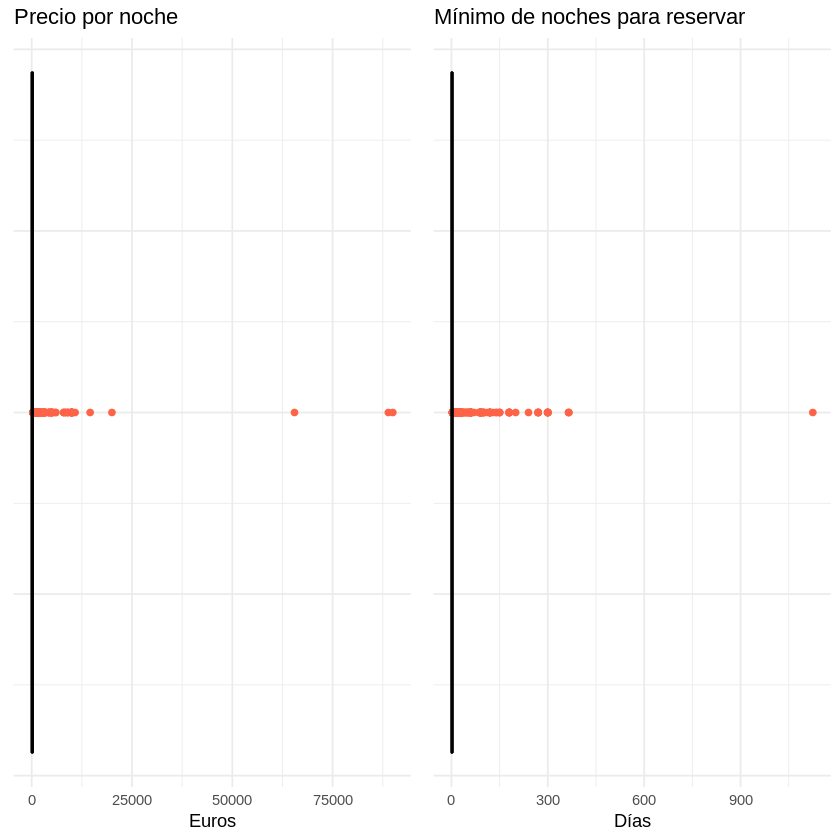

In [ ]:
a <- ggplot(milan, aes(y = price)) +
    geom_boxplot(fill = "SteelBlue", color = "black", outlier.colour = "tomato",coef = 1.5) +
    labs(title = "Precio por noche", y = "Euros") +
    theme_minimal() +
    theme(axis.title.y = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank()) +
    coord_flip()

b <- ggplot(milan, aes(y = minimum_nights)) +
  geom_boxplot(fill = "SteelBlue", color = "black", outlier.colour = "tomato",coef = 1.5) +
  labs(title = "Mínimo de noches para reservar", y = "Días") +
  theme_minimal() +
  theme(axis.title.y = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank()) +
  coord_flip()

grid.arrange(a, b, ncol = 2)

A su vez, decidimos dejar fuera los casos que poseen una última reseña mayor a 60 días, dado que nos interesa trabajar con los establecimientos que son reservados de manera frecuente por los usuarios de Airbnb.


In [ ]:
limite_inferiorp <- (quantile(milan$price, 0.25) - IQR(milan$price)*1.5)

limite_superiorp <- (quantile(milan$price, 0.75) + IQR(milan$price)*1.5)

limite_inferiorn <- (quantile(milan$minimum_nights, 0.25) - IQR(milan$minimum_nights)*1.5)

limite_superiorn <- (quantile(milan$minimum_nights, 0.75) + IQR(milan$minimum_nights)*1.5)

milan <- milan %>%
    filter(price > limite_inferiorp & price < limite_superiorp,
         minimum_nights > limite_inferiorn & minimum_nights < limite_superiorn,
         days_last_review <= 60)

In [ ]:
box_stats <- boxplot(milan$price, plot = FALSE)
lower_whisker <- box_stats$stats[1]
upper_whisker <- box_stats$stats[5]

a1 <- ggplot(milan, aes(x = price)) +
  geom_boxplot(fill = "SteelBlue", color = "black", outlier.colour = "tomato", coef = 1.5, outlier.size = 0.25) +
  labs(title = "Precio por noche") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.y = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x = element_blank()) +
  geom_segment(aes(x = lower_whisker, xend = lower_whisker, y = -0.15, yend = 0.15),
               color = "black") +
  geom_segment(aes(x = upper_whisker, xend = upper_whisker, y = -0.15, yend = 0.15),
               color = "black")

a2 <- ggplot(milan, aes(x = price)) +
  geom_histogram(bins = 35, fill = "SteelBlue", color = "black") +
  labs(x="Euros", y = "Frecuencia") +
  theme_minimal()

Warning message in geom_segment(aes(x = lower_whisker, xend = lower_whisker, y = -0.15, :
“All aesthetics have length 1, but the data has 8517 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = upper_whisker, xend = upper_whisker, y = -0.15, :
“All aesthetics have length 1, but the data has 8517 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


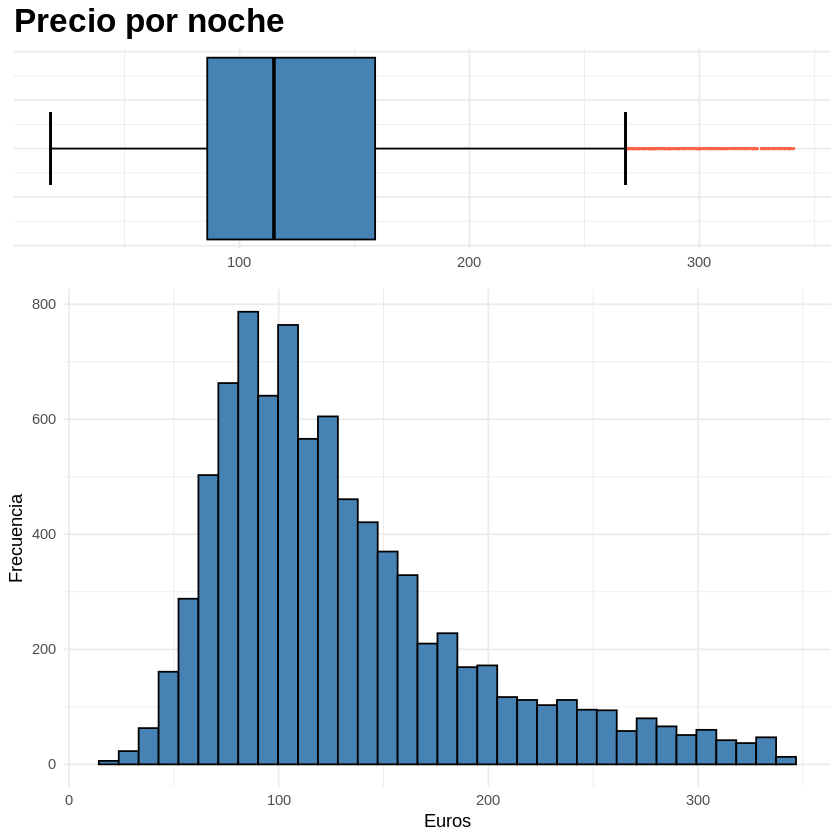

In [ ]:
grid.arrange(a1, a2, ncol = 1, heights = c(5, 10))

In [ ]:
dim(milan)
summary(milan)

[1] 8517   18

       id                name              host_id           host_name        
 Min.   :4.047e+04   Length:8517        Min.   :     1944   Length:8517       
 1st Qu.:5.146e+07   Class :character   1st Qu.: 22680537   Class :character  
 Median :8.830e+17   Mode  :character   Median :122385480   Mode  :character  
 Mean   :7.074e+17                      Mean   :210700298                     
 3rd Qu.:1.095e+18                      3rd Qu.:426472414                     
 Max.   :1.243e+18                      Max.   :599019202                     
 neighbourhood         latitude       longitude      room_type        
 Length:8517        Min.   :45.40   Min.   :9.070   Length:8517       
 Class :character   1st Qu.:45.46   1st Qu.:9.172   Class :character  
 Mode  :character   Median :45.47   Median :9.189   Mode  :character  
                    Mean   :45.47   Mean   :9.189                     
                    3rd Qu.:45.49   3rd Qu.:9.210                     
                    M

Finalmente, con el dataset procesado, quedaron 8517 registros, un precio mediano por noche de 115 EUR y un rango de mínimo de noches que va de 1 a 3 para los registros que tienen reseñas dentro de los últimos 60 días.

In [ ]:
barrios <- milan %>%
  group_by(neighbourhood) %>%
  summarise(
  precio_mediana = median(price),
  precio_promedio = mean(price),
  cantidad_publicaciones = n(),
  cantidad_reviews = sum(number_of_reviews_ltm),
  anfitrion_publicaciones = max(calculated_host_listings_count),
  ocupacion_promedio = mean(availability_365),
  ultima_reseña_promedio = mean(milan$days_last_review))

  head(barrios,3)

neighbourhood precio_mediana precio_promedio cantidad_publicaciones
1 ADRIANO       90.5           104.2812        32                    
2 AFFORI        93.0           102.2614        88                    
3 BAGGIO        70.0            79.2500        24                    
  cantidad_reviews anfitrion_publicaciones ocupacion_promedio
1  495             145                     194.9062          
2 1861             302                     180.6591          
3  424             302                     212.0833          
  ultima_reseña_promedio
1 17.01961 days         
2 17.01961 days         
3 17.01961 days

Por otro lado, agrupamos los casos por barrios para poder complementar el análisis con una mirada agrupada por sector y vinculamos la geometría de cada uno de ellos para poder graficar en un mapa las distintas métricas.

In [ ]:
neighbourhoods_geojson <- st_read("https://data.insideairbnb.com/italy/lombardy/milan/2024-09-17/visualisations/neighbourhoods.geojson")
neighbourhoods_geojson <- select(neighbourhoods_geojson, -neighbourhood_group)

barrios <- barrios %>%
  left_join(neighbourhoods_geojson, by = "neighbourhood")

head(barrios,3)

Reading layer `neighbourhoods' from data source 
  `https://data.insideairbnb.com/italy/lombardy/milan/2024-09-17/visualisations/neighbourhoods.geojson' 
  using driver `GeoJSON'
Simple feature collection with 88 features and 2 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 9.040587 ymin: 45.38674 xmax: 9.278054 ymax: 45.53597
Geodetic CRS:  WGS 84


neighbourhood precio_mediana precio_promedio cantidad_publicaciones
1 ADRIANO       90.5           104.2812        32                    
2 AFFORI        93.0           102.2614        88                    
3 BAGGIO        70.0            79.2500        24                    
  cantidad_reviews anfitrion_publicaciones ocupacion_promedio
1  495             145                     194.9062          
2 1861             302                     180.6591          
3  424             302                     212.0833          
  ultima_reseña_promedio geometry                      
1 17.01961 days          MULTIPOLYGON (((9.255201 45...
2 17.01961 days          MULTIPOLYGON (((9.182039 45...
3 17.01961 days          MULTIPOLYGON (((9.083465 45...

### Alojamientos y precio

En primer lugar, teniendo en cuenta que el precio mediano para un alojamiento publicado en Airbnb en Milán es de 115€, decidimos explorar a través de un mapa como se distribuyen los alojamientos según su precio, pudiendo analizar que las zonas cercanas a medios de transporte como trenes o zonas céntrias de Milán son las que poseen mayor concentración de ellos y a un mayor precio. En estas zonas los precios se acercan bastante al máximo de la distribución, siendo este de 341€.

In [ ]:
library(IRdisplay)
gt_url <- "https://agusz96.github.io/milan-airbnb/mapa.html"
iframe <- sprintf('<iframe src="%s" width="900" height="700px" frameborder="0"></iframe>', gt_url)
display_html(iframe)

Si nos adentramos en el tipo de alojamiento, podemos ver que la amplia mayoría de lo ofertado son departamentos o casas enteras con un 91% de las publicaciones. Una pequeña parte se la llevan las habitaciones privadas con tan solo un 8%.

In [ ]:
library(IRdisplay)
gt_url <- "https://agusz96.github.io/milan-airbnb/alojamiento.html"
iframe <- sprintf('<iframe src="%s" width="800px" height="800px" frameborder="0"></iframe>', gt_url)
display_html(iframe)

Asimismo, en el boxplot precendente podemos observar que el 75% de los anfitriones no supera los 4 alojamientos publicados.

Pero, ¿quiénes son los anfitriones que poseen la mayor cantidad de publicaciones?

In [9]:
library(IRdisplay)
gt_url <- "https://agusz96.github.io/milan-airbnb/anfitriones-top.html"
iframe <- sprintf('<iframe src="%s" width="1200px" height="800px" frameborder="0"></iframe>', gt_url)
display_html(iframe)

En su mayoría parecen ser agencias, inmobiliarias o empresas dedicadas al rubro del alquiler de viviendas.

In [ ]:
library(IRdisplay)
gt_url <- "https://prozenblat14.github.io/ds.02/TPS/TPF/graph1.html"
iframe <- sprintf('<iframe src="%s" width="800" height="750px" frameborder="0"></iframe>', gt_url)
display_html(iframe)

Con respecto a las diferencias de precio entre tipos de alojamiento, los hoteles concentran los precios más elevados mientras que le siguen las casas o departamentos enteros, aunque con bastantes outliers que en bastantes casos superan los precios de las habitaciones de hotel, y finalmente los más económicos son los alojamientos de habitación privada y compartida.

### Reseñas y precio

Si analizamos como se distribuyen los alojamientos en función de la cantidad de reseñas en los últimos 12 meses y su precio por noche, vemos que no hay relación aparente para ningun tipo de alojamentio ofertado.

In [ ]:
library(IRdisplay)
gt_url <- "https://prozenblat14.github.io/ds.02/TPS/TPF/ReseñaPrecio.html"
iframe <- sprintf('<iframe src="%s" width="800" height="700px" frameborder="0"></iframe>', gt_url)
display_html(iframe)

### Métricas por barrio


Sin embargo, cuando agrupamos la información por barrios, se observa una correlación positiva entre ambas variables, donde a mayor cantidad de reseñas en el último mes totales, mayor es el precio promedio de los alojamientos ofertados en cada barrio.

In [ ]:
library(IRdisplay)
gt_url <- "https://agusz96.github.io/milan-airbnb/precio-reviews-barrio.html"
iframe <- sprintf('<iframe src="%s" width="1200" height="800px" frameborder="0"></iframe>', gt_url)
display_html(iframe)

Finalmente, al mapear la información por cada barrio, es más fácil observar como la concentración en el centro de la ciudad se lleva los alojamientos con un precio promedio por noche más elevado, así como la mayor cantidad de concentración de oferta para reservar.

In [22]:
library(IRdisplay)
gt_url <- "https://agusz96.github.io/milan-airbnb/mapa-barrios.html"
iframe <- sprintf('<iframe src="%s" width="1400" height="800px" frameborder="0"></iframe>', gt_url)
display_html(iframe)

## Conclusiones

* Más del 90% de los alojamientos ofertados son Casas o Apartamentos Completos.
* Los hoteles concentran los precios más elevados mientras que le siguen las casas o departamentos enteros, aunque con bastantes outliers y finalmenete las habitaciones privadas y compartidas como el tipo de alojamiento más económico.
* El 75% de los anfitriones no supera los 4 alojamientos publicados.
* Asimismo, los anfitriones con más de 50 alojamientos ofertados, suelen ser agencias, inmobiliarias o empresas dedicadas al rubro del alquiler de viviendas.
* En función de la cantidad de reseñas en los últimos 12 meses y su precio por noche, vemos que no hay relación aparente para ningun tipo de alojamentio ofertado. Sin embargo, la relación existe cuando tratamos los alojamientos agrupados por barrio.
* A mayor cantidad de reseñas en los últimos 12 meses, mayor es el precio promedio de los alojamientos ofertados en cada barrio.
* En el centro de la ciudad se concetran los alojamientos con un precio promedio por noche más elevado, así como la mayor cantidad de oferta para reservar. A medida que uno se aleja hacia las periferias, los precio y la oferta disminuye.